<a href="https://colab.research.google.com/github/mohammad0alfares/EDA/blob/master/HubwayChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [0]:

url = 'https://raw.githubusercontent.com/brl1906/HubwayChallenge/master/Hubway/Data/201712-hubway-tripdata.csv'
df=pd.read_csv(url)

In [136]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,200,2017-12-01 00:02:02,2017-12-01 00:05:22,160,Wentworth Institute of Technology - Huntington...,42.337586,-71.096271,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,-71.087986,1938,Subscriber,1982,0
1,365,2017-12-01 00:06:14,2017-12-01 00:12:20,226,Commonwealth Ave At Babcock St,42.351547,-71.121262,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,57,Subscriber,1997,1
2,297,2017-12-01 00:09:08,2017-12-01 00:14:06,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,76,Central Sq Post Office / Cambridge City Hall a...,42.366426,-71.105495,1201,Subscriber,1977,1
3,1128,2017-12-01 00:09:36,2017-12-01 00:28:24,46,Christian Science Plaza - Massachusetts Ave at...,42.343666,-71.085824,130,Upham's Corner TEMPORARY WINTER LOCATION,42.317509,-71.064166,1148,Subscriber,1991,1
4,2594,2017-12-01 00:10:47,2017-12-01 00:54:01,193,Brookline Village - Station Street @ MBTA TEMP...,42.333765,-71.120464,32,Landmark Center - Brookline Ave at Park Dr,42.345194,-71.101697,1712,Subscriber,1963,1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55072 entries, 0 to 55071
Data columns (total 15 columns):
tripduration               55072 non-null int64
starttime                  55072 non-null object
stoptime                   55072 non-null object
start station id           55072 non-null int64
start station name         55072 non-null object
start station latitude     55072 non-null float64
start station longitude    55072 non-null float64
end station id             55072 non-null int64
end station name           55072 non-null object
end station latitude       55072 non-null float64
end station longitude      55072 non-null float64
bikeid                     55072 non-null int64
usertype                   55072 non-null object
birth year                 55072 non-null object
gender                     55072 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 6.3+ MB


In [5]:
df.groupby('gender')['gender'].count()

gender
0     2371
1    41113
2    11588
Name: gender, dtype: int64

In [6]:
sex = {0:'UnKnown' ,1: 'Male', 2: 'Female'}
df['sex'] = [ sex.get(x,'UnKnown') for x in df['gender']]
df.groupby('sex')['sex'].count()

sex
Female     11588
Male       41113
UnKnown     2371
Name: sex, dtype: int64

In [140]:
tot_trip_count = df.groupby('usertype')['tripduration'].count()
print(tot_trip_count)

usertype
Customer       1980
Subscriber    53092
Name: tripduration, dtype: int64


In [14]:
tot_trip_dur = df.groupby('usertype')['tripduration'].sum()
print (tot_trip_dur)

usertype
Customer       8333773
Subscriber    38751599
Name: tripduration, dtype: int64


In [15]:

avg_dur_sub = tot_trip_dur[0]/tot_trip_count[0]
avg_dur_cas = tot_trip_dur[1]/tot_trip_count[1]
print ('Average Trip Duration for Subscribers=',avg_dur_sub)
print ('Average Trip Duration for Subscribers=',avg_dur_cas)

Average Trip Duration for Subscribers= 4208.976262626263
Average Trip Duration for Subscribers= 729.8952572892338


In [37]:
df.info()?



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55072 entries, 0 to 55071
Data columns (total 15 columns):
tripduration               55072 non-null int64
starttime                  55072 non-null object
stoptime                   55072 non-null object
start station id           55072 non-null int64
start station name         55072 non-null object
start station latitude     55072 non-null float64
start station longitude    55072 non-null float64
end station id             55072 non-null int64
end station name           55072 non-null object
end station latitude       55072 non-null float64
end station longitude      55072 non-null float64
bikeid                     55072 non-null int64
usertype                   55072 non-null object
birth year                 55072 non-null object
gender                     55072 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 6.3+ MB


In [52]:
df[['tripduration', 'starttime', 'stoptime']]
min= df['tripduration'].min()
max= df['tripduration'].max()

print(min, max)

61 2852000


In [125]:
x= df.groupby('bikeid')['tripduration'].count()
x

bikeid
1       10
2       20
3       46
4       15
5       25
        ..
1977    43
1978    52
1979    40
1980    67
1981    26
Name: tripduration, Length: 1501, dtype: int64

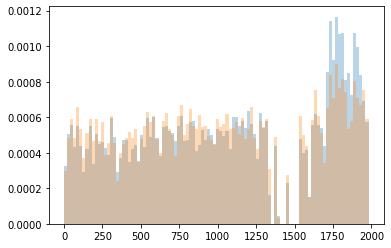

In [34]:

df_male = df[df.sex=='Male']
df_female = df[df.sex=='Female']
kwargs = dict(bins= 100, histtype='stepfilled', alpha=0.3, density=True)
plt.hist(x=df_male['bikeid'], **kwargs)
plt.hist(x=df_female['bikeid'], **kwargs)
plt.show()
